## 1.	**Simulate the Water Jug Problem that follows the following rules in implementation**

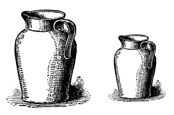


### **Instruction:**

  \# Use a function is used to initialize thedictionary elements with a default value.

  from collections import default dict

  \# jug1 and jug2 contain the value for max capacity in respective jugs and aim is the amount of water to be measured.

  Ex: jug1, jug2, aim = 4, 3, 2

  \# Initialize dictionary with default value as false.

  Eg: visited = default dict(lambda: False)

  \# Recursive function which prints the intermediate steps to reach the final solution and return boolean value: (True if solution is possible, otherwise False).

  \# amt1 and amt2 are the amount of water present in both jugs at a certain point of time.


#**Using defaultdict**  
---



In [ ]:
from collections import defaultdict

def water_jug_solver(jug1, jug2, aim):
    actions = {
        'Empty jug1': lambda state: (0, state[1]),
        'Empty jug2': lambda state: (state[0], 0),
        'Fill jug1': lambda state: (jug1, state[1]),
        'Fill jug2': lambda state: (state[0], jug2),
        'Pour from jug1 to jug2': lambda state: (max(0, state[0] - (jug2 - state[1])), min(jug2, state[0] + state[1])),
        'Pour from jug2 to jug1': lambda state: (min(jug1, state[0] + state[1]), max(0, state[1] - (jug1 - state[0])))
    }

    explored = set()
    frontier = [((0, 0), [])]

    actions_taken_dict = defaultdict(list)

    while frontier:
        current_state, actions_taken = frontier.pop(0)
        if current_state[0] == aim and current_state[1] == 0:
            return [(action, state) for action, state in actions_taken] + [('Goal state', (aim, 0))]

        explored.add(current_state)

        for action, action_fn in actions.items():
            next_state = action_fn(current_state)
            if next_state not in explored:
                actions_taken_dict[next_state].append((action, next_state))
                frontier.append((next_state, actions_taken + [(action, next_state)]))

    return [("No solution found.", )]

jug1, jug2, aim = 4, 3, 2
print('Initial state', (0,0))
solution = water_jug_solver(jug1, jug2, aim)
for step in solution:
    print(*step)


Initial state (0, 0)
Fill jug2 (0, 3)
Pour from jug2 to jug1 (3, 0)
Fill jug2 (3, 3)
Pour from jug2 to jug1 (4, 2)
Empty jug1 (0, 2)
Pour from jug2 to jug1 (2, 0)
Goal state (2, 0)


In [ ]:
from collections import defaultdict

def solve_water_jug_problem(jug1, jug2, aim):
    print(f"The max capacity of jug1 is {jug1}, jug2 is {jug2}, and the aim is to have {aim} liters of water.\n")

    visited = defaultdict(lambda: False)

    def check_aim(cur, cur2, aim):
        if cur == aim:
            print(f"Jug1 now has {aim} liters of water.")
            return True
        elif cur2 == aim:
            print(f"Jug2 now has {aim} liters of water.")
            return True
        return False

    def check_not_possible(cur, cur2):
        key = (cur, cur2)
        return key in visited

    def water_jug_problem(jug1, jug2, aim, cur, cur2, exchange):
        if exchange == 1:
            a = 'jug2'
            b = 'jug1'
        else:
            a = 'jug1'
            b = 'jug2'

        if cur > 0:
            cur2 += cur
            cur = 0
            print(f"Transferred {cur} liters of water from {a} to {b}\n{a} now has {cur} and {b} now has {cur2} liters of water")

        cur = jug1
        print(f"Filled {a}\n{a} now has {cur} liters of water\n{a} now has {cur} and {b} now has {cur2} liters of water")

        key = (cur, cur2)
        visited[key] = True

        if check_aim(cur, cur2, aim):
            return True

        to_transfer = jug2 - cur2
        if to_transfer < cur:
            cur = cur - to_transfer
            cur2 = cur2 + to_transfer
            print(f"Poured {to_transfer} liters of water from {a} to {b}\n{a} now has {cur} and {b} now has {cur2} liters of water")
            if check_aim(cur, cur2, aim):
                return True
            cur2 = 0
            print(f"{b}'s water poured")
        else:
            cur2 = cur2 + cur
            cur = 0
            print(f"Poured water from {a} to {b}\n{a} now has {cur} liters of water and {b} has {cur2} liters of water")

        if check_aim(cur, cur2, aim):
            return True

        if check_not_possible(cur, cur2):
            return False

        return water_jug_problem(jug1, jug2, aim, cur, cur2, exchange)

    if jug1 > jug2:
        return water_jug_problem(jug2, jug1, aim, 0, 0, 1)
    else:
        return water_jug_problem(jug1, jug2, aim, 0, 0, 0)



print("Max capacity")
jug1=int(input("Jug 1 = "))
jug2=int(input("Jug 2 = "))
print()
print("Aim")
aim=int(input("amount to reach: "))

flag = solve_water_jug_problem(jug1, jug2, aim)
print()
print(flag)
if flag:
    print("It is possible to achieve the desired amount of water.")
else:
    print("It is not possible to achieve the desired amount of water.")


Max capacity
Jug 1 = 4
Jug 2 = 3

Aim
amount to reach: 2
The max capacity of jug1 is 4, jug2 is 3, and the aim is to have 2 liters of water.

Filled jug2
jug2 now has 3 liters of water
jug2 now has 3 and jug1 now has 0 liters of water
Poured water from jug2 to jug1
jug2 now has 0 liters of water and jug1 has 3 liters of water
Filled jug2
jug2 now has 3 liters of water
jug2 now has 3 and jug1 now has 3 liters of water
Poured 1 liters of water from jug2 to jug1
jug2 now has 2 and jug1 now has 4 liters of water
Jug1 now has 2 liters of water.

True
It is possible to achieve the desired amount of water.


#**Using aima**
    
>

In [ ]:
!pip install aima3

In [ ]:
from aima3.search import *

class WaterJugProblem(Problem):
    def __init__(self, jug1, jug2, aim):
        self.capacities = (jug1, jug2)
        self.initial = (0, 0)
        self.aim = aim

    def goal_test(self, state):
        return state[0] == self.aim and state[1] == 0

    def actions(self, state):
        (J0, J1) = state
        (C0, C1) = self.capacities
        if J0 > 0: yield 'empty0'
        if J1 > 0: yield 'empty1'
        if J0 < C0: yield 'fill0'
        if J1 < C1: yield 'fill1'
        if J0 > 0 and J1 < C1: yield 'pour0to1'
        if J1 > 0 and J0 < C0: yield 'pour1to0'

    def result(self, state, action):
        (J0, J1) = state
        (C0, C1) = self.capacities
        if action == 'empty0':
            return (0, J1)
        elif action == 'empty1':
            return (J0, 0)
        elif action == 'fill0':
            return (C0, J1)
        elif action == 'fill1':
            return (J0, C1)
        elif action == 'pour0to1':
            amount = min(J0, C1 - J1)
            return (J0 - amount, J1 + amount)
        elif action == 'pour1to0':
            amount = min(J1, C0 - J0)
            return (J0 + amount, J1 - amount)
        else:
            return state

    def h(self, node):
        return 0 if self.goal_test(node.state) else 1

def water_jug_solver(jug1, jug2, aim):
    problem = WaterJugProblem(jug1, jug2, aim)
    result = breadth_first_search(problem)
    if result:
        return [node.state for node in result.path()]
    else:
        return "No solution found."

jug1, jug2, aim = 4, 3, 2
solution = water_jug_solver(jug1, jug2, aim)
print(solution)


[(0, 0), (0, 3), (3, 0), (3, 3), (4, 2), (0, 2), (2, 0)]


In [ ]:
from aima3.search import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class JugFill(Problem):
    def __init__(self, initial=(0, 0), goal=(0, 4), capacities=(3, 5)):
        super().__init__(initial, goal)
        self.capacities = capacities

    def actions(self, state):
        jugs = len(state)
        actions = []
        for i in range(jugs):
            actions.append(('fill', i))
            actions.append(('empty', i))
            for j in range(jugs):
                if i != j:
                    actions.append(('pour', i, j))
        return actions

    def result(self, state, action):
        jugs = list(state)
        action_type = action[0]
        if action_type == 'fill':
            jug_index = action[1]
            jugs[jug_index] = self.capacities[jug_index]
        elif action_type == 'empty':
            jug_index = action[1]
            jugs[jug_index] = 0
        elif action_type == 'pour':
            from_jug, to_jug = action[1], action[2]
            amount_to_pour = min(jugs[from_jug], self.capacities[to_jug] - jugs[to_jug])
            jugs[from_jug] -= amount_to_pour
            jugs[to_jug] += amount_to_pour
        return tuple(jugs)

    def goal_test(self, state):
        return state == self.goal

    def path_cost(self, c, state1, action, state2):
        return c + 1


def update(frame):
    global current_state, actions, ax
    ax.clear()
    action = actions[frame]
    current_state = problem.result(current_state, action)
    ax.bar(['Jug 1', 'Jug 2'], current_state, color=['blue', 'blue'])
    ax.set_ylim(0, max(problem.capacities) + 1)
    ax.set_ylabel('Water Level')
    ax.set_title('Jug Filling')

jug1, jug2, aim = 4, 3, 2
problem = JugFill(initial=(0, 0), goal=(aim, 0), capacities=(jug1, jug2))

try:
    actions = breadth_first_search(problem).solution()
    current_state = problem.initial

    fig, ax = plt.subplots()

    anim = FuncAnimation(fig, update, frames=len(actions), interval=1000, repeat=False)
    plt.close(fig)
    k = anim.to_html5_video()
except:
    k = ''
    print("No solution exists for the given problem.")
HTML(k)

#**Without using both**

In [ ]:
def water_jug_solver(jug1, jug2, aim):
    actions = {
        'Empty jug1': lambda state: (0, state[1]),
        'Empty jug2': lambda state: (state[0], 0),
        'Fill jug1': lambda state: (jug1, state[1]),
        'Fill jug2': lambda state: (state[0], jug2),
        'Pour from jug1 to jug2': lambda state: (max(0, state[0] - (jug2 - state[1])), min(jug2, state[0] + state[1])),
        'Pour from jug2 to jug1': lambda state: (min(jug1, state[0] + state[1]), max(0, state[1] - (jug1 - state[0])))
    }

    explored = set()
    frontier = [((0, 0), [])]

    while frontier:
        current_state, actions_taken = frontier.pop(0)
        if current_state[0] == aim and current_state[1] == 0:
            return [(action, state) for action, state in actions_taken] + [('Goal state', (aim, 0))]

        explored.add(current_state)

        for action, action_fn in actions.items():
            next_state = action_fn(current_state)
            if next_state not in explored:
                frontier.append((next_state, actions_taken + [(action, next_state)]))

    return [("No solution found.", )]

jug1, jug2, aim = 4, 3, 2
print('Initial state', (0,0))
solution = water_jug_solver(jug1, jug2, aim)
for step in solution:
    print(*step)


Initial state (0, 0)
Fill jug2 (0, 3)
Pour from jug2 to jug1 (3, 0)
Fill jug2 (3, 3)
Pour from jug2 to jug1 (4, 2)
Empty jug1 (0, 2)
Pour from jug2 to jug1 (2, 0)
Goal state (2, 0)
